In [1]:
import torch 
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'

import helper
import matplotlib.pyplot as plt




In [2]:
def activation(x):
  '''
Sigmoid 

x: torch.Tensor
|
  '''
  return 1/(1+torch.exp(-x))

In [3]:
#Generate dummy data

torch.manual_seed(7)

features = torch.randn((1,5)) #input

weights = torch.randn_like(features) #weights are derived from features

bias = torch.randn((1,1))


In [4]:
print(torch.mm(features,weights.T)) # .T for transpose same as in numpy
#perceptron

y_hat = activation(torch.sum(features * weights) + bias) # * operator for element-wise muliplication (Hadamard product) 
print(y_hat)

print(activation(torch.mm(features,weights.T)+bias))


tensor([[-1.9796]])
tensor([[0.1595]])
tensor([[0.1595]])


In [5]:
# multilayer

features = torch.randn((1,3))
input_ = features.shape[1]
hidden =2
output =1

w1= torch.randn(input_,hidden) # 3x2
w2= torch.randn(hidden,output) # 2x1

b1= torch.randn(1,hidden)
b2= torch.randn(1,output)

h = activation(torch.mm(features,w1)+b1)
y = activation(torch.mm(h,w2)+b2)
print(y)

array = np.random.rand(3,4)
print(array)
tensor = torch.from_numpy(array) #convert numpy array to pytorch tensor
print(tensor)

tensor.mul_(3) # memory is shared between numpy object and pytorch object 
print(tensor)
print(array)

tensor.numpy() # converted back to numpy array


tensor([[0.8805]])
[[0.26625497 0.8890093  0.0733678  0.98467827]
 [0.71946113 0.90930557 0.64566559 0.50330823]
 [0.19593876 0.91271749 0.12406264 0.72921025]]
tensor([[0.2663, 0.8890, 0.0734, 0.9847],
        [0.7195, 0.9093, 0.6457, 0.5033],
        [0.1959, 0.9127, 0.1241, 0.7292]], dtype=torch.float64)
tensor([[0.7988, 2.6670, 0.2201, 2.9540],
        [2.1584, 2.7279, 1.9370, 1.5099],
        [0.5878, 2.7382, 0.3722, 2.1876]], dtype=torch.float64)
[[0.7987649  2.66702791 0.2201034  2.9540348 ]
 [2.15838338 2.72791671 1.93699677 1.5099247 ]
 [0.58781628 2.73815248 0.37218792 2.18763075]]


array([[0.7987649 , 2.66702791, 0.2201034 , 2.9540348 ],
       [2.15838338, 2.72791671, 1.93699677, 1.5099247 ],
       [0.58781628, 2.73815248, 0.37218792, 2.18763075]])

In [6]:
# NN module
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.




<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


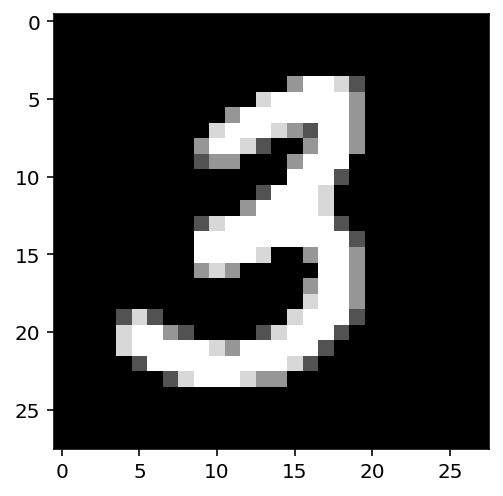

In [7]:
data = iter(trainloader)
images,labels = data.next()
print(type(images))
print(images.shape)
print(labels.shape)

plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r');

In [8]:
inputs = images.view(images.shape[0],-1) # flatten input, transform into a vector
print(inputs.shape)
w1=torch.randn(784,256)
w2=torch.randn(256,10)
b1=torch.randn(256)
b2=torch.randn(10)
print(b2)

hidden = activation(torch.mm(inputs,w1)+b1)
out = (torch.mm(hidden,w2)+b2)
print(out.shape)



torch.Size([64, 784])
tensor([-0.9941, -1.1237,  1.2772,  1.3494, -0.7454,  0.8193,  1.3787,  0.7940,
         0.3671,  1.7313])
torch.Size([64, 10])


In [9]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)


output = softmax(out)
print(output.shape)
print(output.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [10]:
class MNIST(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [11]:
classifier = MNIST()
classifier

MNIST(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
  (relu): ReLU()
)

In [12]:
class MNISTv2(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x


In [13]:
classifier_2 = MNISTv2()
classifier_2


MNISTv2(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [14]:
print(classifier_2.fc1.weight)
print(classifier_2.fc1.bias)

Parameter containing:
tensor([[ 0.0340,  0.0067,  0.0152,  ...,  0.0171, -0.0345,  0.0263],
        [ 0.0049, -0.0070,  0.0175,  ..., -0.0035, -0.0112,  0.0164],
        [ 0.0284,  0.0210, -0.0287,  ...,  0.0231, -0.0279, -0.0132],
        ...,
        [-0.0257, -0.0091, -0.0303,  ...,  0.0010,  0.0221,  0.0105],
        [ 0.0015, -0.0126,  0.0071,  ...,  0.0034,  0.0136,  0.0090],
        [-0.0145, -0.0175,  0.0015,  ...,  0.0006, -0.0315,  0.0100]],
       requires_grad=True)
Parameter containing:
tensor([-0.0288,  0.0176,  0.0343,  0.0254, -0.0033,  0.0076, -0.0077, -0.0086,
         0.0209, -0.0210,  0.0286,  0.0117, -0.0188,  0.0013, -0.0105, -0.0211,
         0.0009,  0.0022, -0.0245,  0.0222, -0.0050, -0.0263, -0.0247, -0.0289,
         0.0260,  0.0025,  0.0036, -0.0316,  0.0287, -0.0115,  0.0257,  0.0206,
        -0.0044, -0.0181,  0.0273,  0.0284,  0.0059, -0.0242, -0.0130,  0.0023,
         0.0158,  0.0281,  0.0183,  0.0060, -0.0267, -0.0293, -0.0307, -0.0172,
         0.0064

In [15]:
classifier_2.fc1.bias.data.fill_(0)
classifier_2.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0044, -0.0061, -0.0020,  ..., -0.0013, -0.0023, -0.0110],
        [ 0.0040, -0.0042, -0.0083,  ...,  0.0004,  0.0144, -0.0019],
        [ 0.0127, -0.0118, -0.0191,  ..., -0.0086, -0.0132,  0.0149],
        ...,
        [ 0.0015,  0.0023,  0.0140,  ...,  0.0114, -0.0020,  0.0191],
        [ 0.0032,  0.0029, -0.0183,  ..., -0.0111,  0.0016,  0.0088],
        [-0.0031,  0.0029, -0.0026,  ..., -0.0001,  0.0053,  0.0122]])

In [16]:
def view_classify(img, ps, version="MNIST"): # borrow code for visualizing 
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

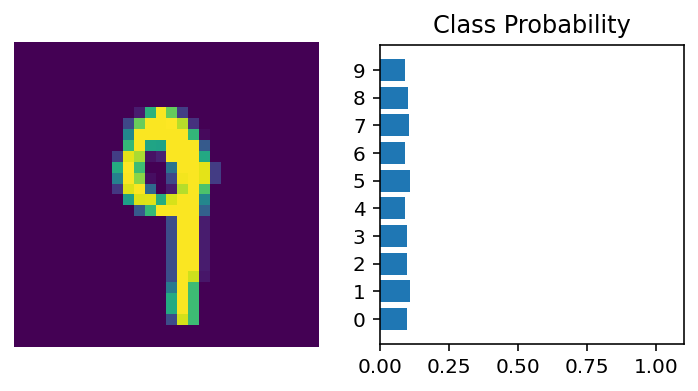

In [17]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = classifier_2.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

# you can also use nn.Sequential

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# use dicts for convenience and codifying
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model
# you can now reference parts of the model by keyword